In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib as mpl
import numpy as np
import scipy.integrate as intgr
import matplotlib.ticker as mtick

In [4]:
plt.style.use('aps')
mpl.rcParams["figure.figsize"] = [3.4039, 2.10373]

rm = 2.9673;

In [5]:
def normalize_psi_PIMC(psi, x):
   int_psi_square = 2*np.pi*25*intgr.simps(x*psi, x)
   print ("Norm = " + str(int_psi_square))
   return int_psi_square


def radial_ave(ψ,X,Y):

    x = X[0,:]
    y = Y[:,0]
    N = X.shape[0]
    dx = X[1,0]-X[0,0]
    dR = np.sqrt(2*dx**2)
    dϕ = 2*π/N
    r_vals = np.arange(0, R, dR)
    ϕ_vals = np.arange(0, 2*π, dϕ)

    if len(r_vals)*len(ϕ_vals) > N**2:
        print("Warning: Oversampling")

    # Initialize data on polar grid with fill values
    fill_value = -9999.0
    data_polar = fill_value*np.ones((len(r_vals), len(ϕ_vals)))

    # Define radius of influence. A nearest neighbour outside this radius will not
    # be taken into account.
    radius_of_influence = np.sqrt(0.1**2 + 0.1**2)

    # For each cell in the polar grid, find the nearest neighbour in the cartesian
    # grid. If it lies within the radius of influence, transfer the corresponding
    # data.
    for r, row_polar in zip(r_vals, range(len(r_vals))):
        for ϕ, col_polar in zip(ϕ_vals, range(len(ϕ_vals))):
            # Transform polar to cartesian
            _x = r*np.cos(ϕ)
            _y = r*np.sin(ϕ)

            # Find nearest neighbour in cartesian grid
            d = np.sqrt((_x-X)**2 + (_y-Y)**2)
            nn_row_cart, nn_col_cart = np.unravel_index(np.argmin(d), d.shape)
            dmin = d[nn_row_cart, nn_col_cart]

            # Transfer data
            if dmin <= radius_of_influence:
                data_polar[row_polar, col_polar] = ψ[nn_row_cart, nn_col_cart]

    # Mask remaining fill values
    data_polar = np.ma.masked_equal(data_polar, fill_value)

    return r_vals, np.average(data_polar,axis=1)

In [6]:
fname = "R4/Final-wavefunction-ArR4.npy"
with open(fname, 'rb') as f:
    psif = np.load(f)/np.sqrt((rm**5))
#psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
print(psif.shape)
#print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
rho_rad = []
π = np.pi
R = np.sqrt(np.max(xrad)**2 +np.max(yrad)**2)*rm
for iz in range(nz):
   rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
   rho_rad.append(rho)
rho_rad = np.asarray(rho_rad)
radial = np.mean(rho_rad, axis = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'R4/Final-wavefunction-ArR4.npy'

In [4]:
def cc(arg):
    return mcolors.to_rgba(arg,alpha=0.6)

In [5]:
#xs = np.arange(0, 10, 0.4)
verts = []
Rs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]
fname_arr = ["R4/Final-wavefunction-ArR4.npy","R5/Final-wavefunction-ArR5.npy","R6/Final-wavefunction-ArR6.npy","R8/Final-wavefunction-ArR8.npy","R10/Final-wavefunction-ArR10.npy","R12/Final-wavefunction-ArR12.npy"]
for Rv in range(len(Rs)):
    fname = fname_arr[Rv]
    R = Rs[Rv]
    Lx = 2*R; Ly = 2*R; Lz = 25
    Lxnd = Lx/rm;
    Lynd = Ly/rm;
    Lznd = Lz/rm;
    nx = 72
    ny = 72
    nz = 12
    dx = Lxnd/nx
    dy = Lynd/ny
    dz = Lznd/nz

    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;

    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))
    y = dy * np.arange(-ny/2,ny/2,1)
    z = dz * np.arange(-nz/2, nz/2,1)

    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing='ij')
    xrad,yrad = np.meshgrid(x,y, indexing='ij')
    with open(fname, 'rb') as f:
        psif = np.load(f)/np.sqrt((rm**5))
    #psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
    print(psif.shape)
    #print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
    p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
    rho_rad = []
    π = np.pi
    for iz in range(nz):
       rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
       rho_rad.append(rho)
    rho_rad = np.asarray(rho_rad)
    radial = np.mean(rho_rad, axis = 0)
    normalize_psi_PIMC(radial,rval)
    rval = np.insert(rval, 0, -0.1) 
    radial = np.insert(radial, 0, 0)
    radial[-1] = 0
    verts.append(list(zip(rval, radial)))

(72, 72, 72, 72, 12)
Norm = 1.9971717798152144
(72, 72, 72, 72, 12)
Norm = 2.0099481159782124
(72, 72, 72, 72, 12)
Norm = 2.0114325330575586
(72, 72, 72, 72, 12)
Norm = 1.9792809405455685
(72, 72, 72, 72, 12)
Norm = 2.0832307929164346
(72, 72, 72, 72, 12)
Norm = 1.9641864217398344


In [20]:
poly = PolyCollection(verts, facecolors=[cc('#D7414E'), cc('#D7414E'), cc('#D7414E') ,cc('#D7414E'),cc('#D7414E'),cc('#D7414E')])

In [7]:
#xs = np.arange(0, 10, 0.4)
verts1 = []
Rs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]
fname_arr = ["R4/Final-wavefunction-MgR4.npy","R5/Final-wavefunction-MgR5.npy","R6/Final-wavefunction-MgR6.npy","R8/Final-wavefunction-MgR8.npy","R10/Final-wavefunction-MgR10.npy","R12/Final-wavefunction-MgR12.npy"]
for Rv in range(len(Rs)):
    fname = fname_arr[Rv]
    R = Rs[Rv]
    Lx = 2*R; Ly = 2*R; Lz = 25
    Lxnd = Lx/rm;
    Lynd = Ly/rm;
    Lznd = Lz/rm;
    nx = 72
    ny = 72
    nz = 12
    dx = Lxnd/nx
    dy = Lynd/ny
    dz = Lznd/nz

    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;

    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))
    y = dy * np.arange(-ny/2,ny/2,1)
    z = dz * np.arange(-nz/2, nz/2,1)

    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing='ij')
    xrad,yrad = np.meshgrid(x,y, indexing='ij')
    with open(fname, 'rb') as f:
        psif = np.load(f)/np.sqrt((rm**5))
    #psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
    print(psif.shape)
    #print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
    p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
    rho_rad = []
    π = np.pi
    for iz in range(nz):
       rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
       rho_rad.append(rho)
    rho_rad = np.asarray(rho_rad)
    radial = np.mean(rho_rad, axis = 0)
    normalize_psi_PIMC(radial,rval)
    rval = np.insert(rval, 0, -0.1) 
    radial = np.insert(radial, 0, 0)
    radial[-1] = 0
    verts1.append(list(zip(rval, radial)))

(72, 72, 72, 72, 12)
Norm = 2.009542073034468
(72, 72, 72, 72, 12)
Norm = 1.997752089592978
(72, 72, 72, 72, 12)
Norm = 2.0036938998892677
(72, 72, 72, 72, 12)
Norm = 1.9955121536771832
(72, 72, 72, 72, 12)
Norm = 1.9680349588872026
(72, 72, 72, 72, 12)
Norm = 2.0196846721998094


In [21]:
poly2 = PolyCollection(verts1, facecolors=[cc('#79C9A4'), cc('#79C9A4'), cc('#79C9A4'),cc('#79C9A4'),cc('#79C9A4'),cc('#79C9A4')])

In [9]:
#xs = np.arange(0, 10, 0.4)
verts2 = []
Rs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]
fname_arr = ["R4/Final-wavefunction-CsR4.npy","R5/Final-wavefunction-CsR5.npy","R6/Final-wavefunction-CsR6.npy","R8/Final-wavefunction-CsR8.npy","R10/Final-wavefunction-CsR10.npy","R12/Final-wavefunction-CsR12.npy"]
for Rv in range(len(Rs)):
    fname = fname_arr[Rv]
    R = Rs[Rv]
    Lx = 2*R; Ly = 2*R; Lz = 25
    Lxnd = Lx/rm;
    Lynd = Ly/rm;
    Lznd = Lz/rm;
    nx = 72
    ny = 72
    nz = 12
    dx = Lxnd/nx
    dy = Lynd/ny
    dz = Lznd/nz

    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;

    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))
    y = dy * np.arange(-ny/2,ny/2,1)
    z = dz * np.arange(-nz/2, nz/2,1)

    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing='ij')
    xrad,yrad = np.meshgrid(x,y, indexing='ij')
    with open(fname, 'rb') as f:
        psif = np.load(f)/np.sqrt((rm**5))
    #psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
    print(psif.shape)
    #print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
    p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
    rho_rad = []
    π = np.pi
    for iz in range(nz):
       rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
       rho_rad.append(rho)
    rho_rad = np.asarray(rho_rad)
    radial = np.mean(rho_rad, axis = 0)
    normalize_psi_PIMC(radial,rval)
    rval = np.insert(rval, 0, -0.1) 
    radial = np.insert(radial, 0, 0)
    radial[-1] = 0
    verts2.append(list(zip(rval, radial)))

(72, 72, 72, 72, 12)
Norm = 2.0209803637604087
(72, 72, 72, 72, 12)
Norm = 2.008925970359166
(72, 72, 72, 72, 12)
Norm = 2.0018456412621326
(72, 72, 72, 72, 12)
Norm = 1.9996901830898484
(72, 72, 72, 72, 12)
Norm = 1.9964563335779688
(72, 72, 72, 72, 12)
Norm = 2.006444683024636


In [22]:
poly3 = PolyCollection(verts2, facecolors=[cc('#5E4FA2'), cc('#5E4FA2'), cc('#5E4FA2'),cc('#5E4FA2'),cc('#5E4FA2'),cc('#5E4FA2')])

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


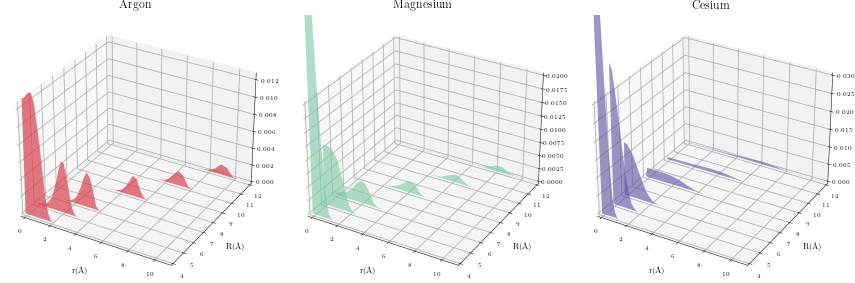

In [23]:
figsize = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=(2*figsize[0],figsize[1]),constrained_layout=True)
#fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), projection='3d',constrained_layout=True)
ax1 = fig.add_subplot(131,projection='3d')
poly.set_alpha(0.7)
ax1.add_collection3d(poly, zs=Rs, zdir='y')
ax1.set_xlabel('r(Å)',labelpad=0)
ax1.set_xlim3d(-0.1, 11)
ax1.set_ylabel('R(Å)',labelpad=0)
ax1.set_ylim3d(4.0, 12.0)
#ax1.set_zlabel(r'$\rho(r)$',labelpad=0)
ax1.set_zlim3d(0, 0.0125)
ax1.tick_params(labelsize=6,pad=0)
#ax1.zaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax1.set_title('Argon')
ax2 = fig.add_subplot(132,projection='3d')
poly.set_alpha(0.7)
ax2.add_collection3d(poly2, zs=Rs, zdir='y')
ax2.set_xlabel('r(Å)',labelpad=0)
ax2.set_xlim3d(-0.1, 11)
ax2.set_ylabel('R(Å)',labelpad=0)
ax2.set_ylim3d(4.0, 12.0)
#ax2.set_zlabel(r'$\rho(r)$',labelpad=0)
ax2.set_zlim3d(0, 0.02)
ax2.set_title('Magnesium')
ax2.tick_params(labelsize=6,pad=0)
ax3 = fig.add_subplot(133,projection='3d')
poly.set_alpha(0.7)
ax3.add_collection3d(poly3, zs=Rs, zdir='y')
ax3.set_xlabel('r(Å)',labelpad=0)
ax3.set_xlim3d(-0.1, 11)
ax3.set_ylabel('R(Å)',labelpad=0)
ax3.set_ylim3d(4.0, 12.0)
#ax3.set_zlabel(r'$\rho(r)$',labelpad=0)
ax3.set_zlim3d(0, 0.03)
ax3.set_title('Cesium')
ax3.tick_params(labelsize=6,pad=0)
plt.savefig('Waterfalls.pdf')
#plt.savefig('WaterfallAr.pdf')
#plt.show()

In [69]:
#xs = np.arange(0, 10, 0.4)
"""
verts = []
Rs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]
fname_arr = ["R4/Final-wavefunction-MgR4.npy","R5/Final-wavefunction-MgR5.npy","R6/Final-wavefunction-MgR6.npy","R8/Final-wavefunction-MgR8.npy","R10/Final-wavefunction-MgR10.npy","R12/Final-wavefunction-MgR12.npy"]
for Rv in range(len(Rs)):
    fname = fname_arr[Rv]
    R = Rs[Rv]
    Lx = 2*R; Ly = 2*R; Lz = 25
    Lxnd = Lx/rm;
    Lynd = Ly/rm;
    Lznd = Lz/rm;
    nx = 72
    ny = 72
    nz = 12
    dx = Lxnd/nx
    dy = Lynd/ny
    dz = Lznd/nz

    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;

    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))
    y = dy * np.arange(-ny/2,ny/2,1)
    z = dz * np.arange(-nz/2, nz/2,1)

    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing='ij')
    xrad,yrad = np.meshgrid(x,y, indexing='ij')
    with open(fname, 'rb') as f:
        psif = np.load(f)/np.sqrt((rm**5))
    #psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
    print(psif.shape)
    #print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
    p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
    rho_rad = []
    π = np.pi
    for iz in range(nz):
       rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
       rho_rad.append(rho)
    rho_rad = np.asarray(rho_rad)
    radial = np.mean(rho_rad, axis = 0)
    normalize_psi_PIMC(radial,rval)
    rval = np.insert(rval, 0, -0.1) 
    radial = np.insert(radial, 0, 0)
    radial[-1] = 0
    verts.append(list(zip(rval, radial)))
"""

'\nverts = []\nRs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]\nfname_arr = ["R4/Final-wavefunction-MgR4.npy","R5/Final-wavefunction-MgR5.npy","R6/Final-wavefunction-MgR6.npy","R8/Final-wavefunction-MgR8.npy","R10/Final-wavefunction-MgR10.npy","R12/Final-wavefunction-MgR12.npy"]\nfor Rv in range(len(Rs)):\n    fname = fname_arr[Rv]\n    R = Rs[Rv]\n    Lx = 2*R; Ly = 2*R; Lz = 25\n    Lxnd = Lx/rm;\n    Lynd = Ly/rm;\n    Lznd = Lz/rm;\n    nx = 72\n    ny = 72\n    nz = 12\n    dx = Lxnd/nx\n    dy = Lynd/ny\n    dz = Lznd/nz\n\n    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;\n\n    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))\n    y = dy * np.arange(-ny/2,ny/2,1)\n    z = dz * np.arange(-nz/2, nz/2,1)\n\n    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing=\'ij\')\n    xrad,yrad = np.meshgrid(x,y, indexing=\'ij\')\n    with open(fname, \'rb\') as f:\n        psif = np.load(f)/np.sqrt((rm**5))\n    #psif = np.load(f)/(d

In [ ]:
#poly2 = PolyCollection(verts, facecolors=[cc('#5E4Fa2'), cc('#3C93B8'), cc('#FDBB6C'),cc('#F57949'),cc('#D7414E'),cc('#9E0142')])

In [61]:
"""
ax2 = fig.add_subplot(132,projection='3d')
poly.set_alpha(0.7)
ax2.add_collection3d(poly2, zs=Rs, zdir='y')
ax2.set_xlabel('r')
ax2.set_xlim3d(-0.1, 10)
ax2.set_ylabel('R')
ax2.set_ylim3d(4.0, 12.0)
ax2.set_zlabel(r'$\rho(r)$')
ax2.set_zlim3d(0, 0.0125)
ax2.set_title('Magnesium')
#plt.show()
"""

Text(0.5, 0.92, 'Magnesium')

In [62]:
#xs = np.arange(0, 10, 0.4)
"""
verts = []
Rs = [4.0, 5.0, 6.0, 8.0, 10.0, 12.0]
fname_arr = ["R4/Final-wavefunction-CsR4.npy","R5/Final-wavefunction-CsR5.npy","R6/Final-wavefunction-CsR6.npy","R8/Final-wavefunction-CsR8.npy","R10/Final-wavefunction-CsR10.npy","R12/Final-wavefunction-CsR12.npy"]
for Rv in range(len(Rs)):
    fname = fname_arr[Rv]
    R = Rs[Rv]
    Lx = 2*R; Ly = 2*R; Lz = 25
    Lxnd = Lx/rm;
    Lynd = Ly/rm;
    Lznd = Lz/rm;
    nx = 72
    ny = 72
    nz = 12
    dx = Lxnd/nx
    dy = Lynd/ny
    dz = Lznd/nz

    xmin = -Lxnd/2; xmax = Lxnd/2; ymin = -Lynd/2; ymax = Lynd/2; zmin = -Lznd/2; zmax = Lznd/2;

    x = dx * np.concatenate((np.arange(-nx/2,0,1),np.arange(0,nx/2,1)))
    y = dy * np.arange(-ny/2,ny/2,1)
    z = dz * np.arange(-nz/2, nz/2,1)

    x1, x2, y1, y2, zr = np.meshgrid(x,x,y,y,z, indexing='ij')
    xrad,yrad = np.meshgrid(x,y, indexing='ij')
    with open(fname, 'rb') as f:
        psif = np.load(f)/np.sqrt((rm**5))
    #psif = np.load(f)/(dx*dy*np.sqrt(dz*rm)*rm*rm)
    print(psif.shape)
    #print(np.sum(np.abs(psif)**2)*(dx*dx*dy*dy*dz)*(rm**5))
    p = np.sum(np.abs(np.multiply(np.conj(psif),psif)),axis=(1,3))*dx*dy*rm*rm
    rho_rad = []
    π = np.pi
    for iz in range(nz):
       rval,rho = radial_ave(p[:,:,iz], xrad*rm, yrad*rm)
       rho_rad.append(rho)
    rho_rad = np.asarray(rho_rad)
    radial = np.mean(rho_rad, axis = 0)
    normalize_psi_PIMC(radial,rval)
    rval = np.insert(rval, 0, -0.1) 
    radial = np.insert(radial, 0, 0)
    radial[-1] = 0
    verts.append(list(zip(rval, radial)))
"""

(72, 72, 72, 72, 12)
Norm = 2.0209803637604087
(72, 72, 72, 72, 12)
Norm = 2.008925970359166
(72, 72, 72, 72, 12)
Norm = 2.0018456412621326
(72, 72, 72, 72, 12)
Norm = 1.9996901830898484
(72, 72, 72, 72, 12)
Norm = 1.9964563335779688
(72, 72, 72, 72, 12)
Norm = 2.006444683024636


In [63]:
#poly3 = PolyCollection(verts, facecolors=[cc('#5E4Fa2'), cc('#3C93B8'), cc('#FDBB6C'),cc('#F57949'),cc('#D7414E'),cc('#9E0142')])

In [64]:
ax3 = fig.add_subplot(133,projection='3d')
poly.set_alpha(0.7)
ax3.add_collection3d(poly3, zs=Rs, zdir='y')
ax3.set_xlabel('r')
ax3.set_xlim3d(-0.1, 10)
ax3.set_ylabel('R')
ax3.set_ylim3d(4.0, 12.0)
ax3.set_zlabel(r'$\rho(r)$')
ax3.set_zlim3d(0, 0.0125)
ax3.set_title('Cesium')
plt.savefig('Waterfalls.pdf')

<Figure size 245.081x151.469 with 0 Axes>